In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

DATA_POINTS = 10000
CLUSTERS = 10
DIMENSIONS = 2

def generate_gmm_data(points, components, dimensions):
    np.random.seed(10)
    c_means = np.random.normal(size=[components, dimensions]) * 10
    c_variances = np.abs(np.random.normal(size=[components, dimensions]))
    c_weights = np.abs(np.random.normal(size=[components]))
    c_weights /= np.sum(c_weights)
    result = np.zeros((points, dimensions), dtype=np.float32)
    for i in range(points):
        comp = np.random.choice(np.array(range(10)), p=c_weights)
        result[i] = np.random.multivariate_normal(
            c_means[comp], np.diag(c_variances[comp])
        )
    np.random.seed()
    return result, c_means, c_variances, c_weights

def plot_clustered_data(points, c_means, c_assignments):
    colors = cm.rainbow(np.linspace(0, 1, CLUSTERS))
    for cluster, color in zip(range(CLUSTERS), colors):
        c_points = points[c_assignments == cluster]
        plt.plot(c_points[:, 0], c_points[:, 1], ".", color=color, zorder=0)
        plt.plot(c_means[cluster, 0], c_means[cluster, 1], ".", color="black", zorder=1)
    plt.show()

# generating DATA_POINTS points from a GMM with CLUSTERS components
data, true_means, true_variances, true_weights = generate_gmm_data(DATA_POINTS, CLUSTERS, DIMENSIONS)

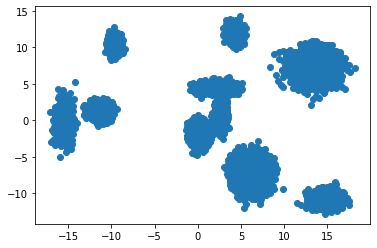

In [2]:
plt.scatter(data[:,0],data[:,1])

In [4]:
from model.KMeans import KMeans

In [5]:
# RUNNING COMPUTATIONAL GRAPH
sess = tf.Session()
model = KMeans(sess)
model = model.construct_model(data)

In [6]:
model.train(data)

1:	distortion 109716.43	re-assignments 2502
2:	distortion 75012.38	re-assignments 844
3:	distortion 70917.78	re-assignments 482
4:	distortion 58596.07	re-assignments 272
5:	distortion 56156.47	re-assignments 267
6:	distortion 52986.99	re-assignments 429
7:	distortion 45896.63	re-assignments 156
8:	distortion 45294.87	re-assignments 51
9:	distortion 45275.38	re-assignments 26
10:	distortion 45271.66	re-assignments 16
11:	distortion 45270.48	re-assignments 9
12:	distortion 45269.81	re-assignments 7
13:	distortion 45269.08	re-assignments 9
14:	distortion 45268.53	re-assignments 5
15:	distortion 45268.47	re-assignments 3
16:	distortion 45268.42	re-assignments 4
17:	distortion 45268.35	re-assignments 4
18:	distortion 45268.29	re-assignments 0


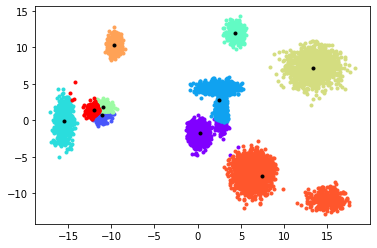

In [7]:
plot_clustered_data(data, model.c_means, model.c_assignments)